In [1]:
import Simulation.pys.fast_sim.dust_effect_onEBV_Rv_quick as de
from importlib import reload
import numpy as np
import pickle as pkl
import Simulation.pys.para.model_para as Mp
import Simulation.pys.para.fast_para as qMp
import matplotlib.pyplot as plt
import healpy as hp
import time 
import tqdm

100%|██████████| 40/40 [00:01<00:00, 26.54it/s]


In [2]:
with open('../../data/test_model/test_cosmo_pack.pkl', 'rb') as f:
    cosmo_pack = pkl.load(f)
    
with open('../../data/test_model/test_dust_pack.pkl', 'rb') as f:
    dust_pack = pkl.load(f)
    
with open('../../data/test_model/test_EBV_Rv_mask_list.pkl', 'rb') as f:
    mask = pkl.load(f)


In [3]:
type(mask)

dict

In [7]:
usable_label = list(mask.keys())
del mask

In [17]:
with open('../../data/test_model/discrete_EBVRvmap.pkl', 'rb') as f:
    retrived_map = pkl.load(f)
    

obs_f = {"EBV_in": dust_pack['EBV_in'], #np.zeros_like(EBV_in),
         "EBV_out": Mp.SFD, #np.zeros_like(EBV_out),
         "Band_coefficient_in": dust_pack['band_coefficient_Rv'],
         "Band_coefficient_out": dust_pack['band_coefficient_ccm_31'],
         "ErrorModel_clean": Mp.errModel_clean,
         "ErrorModel_obs":Mp.errModel_dust,
         "nside":Mp.nside,
         "photoz_est": [Mp.photo_z_estimator_RF],
         "Rv_map": dust_pack["Rv_map"], 
         "mask" : retrived_map['mask']== 1,
         "zbin_in": Mp.zbin_in,
         "zbin_out": Mp.zbin_out}

In [9]:
reload(de)
dust_effect = de.all_dusteffect(usable_label, qMp.EBV_in_bins,qMp.Rv_bins,
                                     qMp.EBV_out_bins,Mp.template_cata_shell, [int(5e4)]*40, obs_f
                                    , choice = "dust")

100%|██████████| 700/700 [1:17:18<00:00,  6.63s/it]


In [12]:
dust_effect

{'clean': {},
 'dust': {(np.int64(1),
   np.int64(5),
   np.int64(1)): array([[  879,  1415,   325,   185,   184,   145, 46867],
         [ 1648,  2405,   385,   226,   163,   141, 45032],
         [ 2725,  3742,   648,   284,   179,   120, 42302],
         [ 3864,  4888,   928,   316,   186,   119, 39699],
         [ 5223,  6221,  1231,   433,   239,   159, 36494],
         [ 6590,  7267,  1661,   571,   296,   186, 33429],
         [ 7449,  8245,  1955,   641,   354,   234, 31122],
         [ 8527, 10397,  2586,   855,   457,   252, 26926],
         [ 9160, 13797,  3289,  1159,   601,   290, 21704],
         [10243, 19106,  4225,  1475,   731,   423, 13797],
         [ 9797, 24926,  5418,  1690,   707,   382,  7080],
         [10088, 24994,  7909,  2055,   769,   445,  3740],
         [ 9957, 22104, 11491,  2572,   974,   483,  2419],
         [ 9725, 17258, 16609,  3319,   982,   547,  1560],
         [ 9620,  9906, 22877,  4631,  1234,   604,  1128],
         [ 9143,  4139, 26401, 

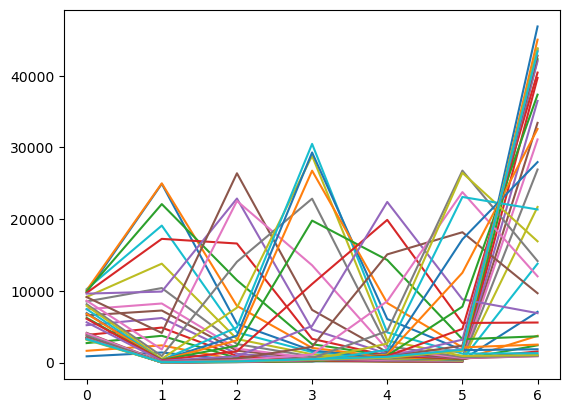

In [16]:
plt.plot(dust_effect["dust"][usable_label[0]].T)

In [47]:
# for i in range(10):
#     plt.figure()
#     plt.plot(dust_effect_high["clean"][usable_label[370]][i]/np.sum(dust_effect_high["clean"][usable_label[370]][i]))
#     plt.plot(dust_effect_high["dust"][usable_label[370]][i]/np.sum(dust_effect_high["dust"][usable_label[370]][i]))
#     

In [10]:
# with open('../../data/test_model/test_dust_effect.pkl', 'wb') as f:
#     pkl.dump(dust_effect, f) 

In [253]:
# plt.plot(Mp.zcenter_in, test_result["true_Ncount"])
# plt.plot(Mp.zcenter_in, test_result_dust["true_Ncount"])
# 
# plt.plot(Mp.zcenter_in, test_result["detected_Ncount"])
# plt.plot(Mp.zcenter_in, test_result_dust["detected_Ncount"])
# plt.figure()
# plt.plot(Mp.zcenter_in, test_result["missing_rate"])